## ARIMA-model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from pmdarima.arima.utils import ndiffs

In [2]:
var_set = pd.read_csv('var_set.csv', parse_dates=[0],index_col=[0])

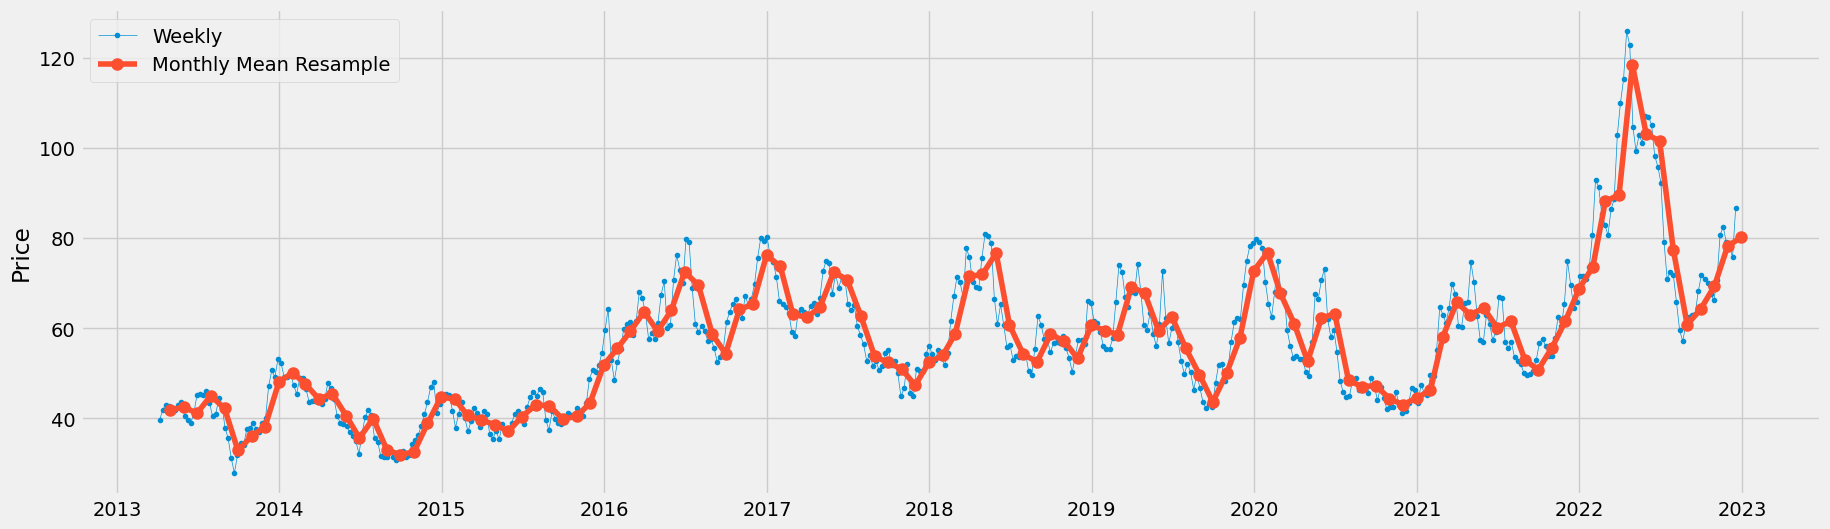

In [3]:
y = var_set['SalmonPrice']
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('Price')
ax.legend();
plt.savefig('Figures/ARIMA/MonthlyMeanPlot.png')

In [4]:
var_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 507 entries, 2013-04-07 to 2022-12-18
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalmonPrice   507 non-null    float64
 1   CodPrice      507 non-null    float64
 2   HalibutPrice  507 non-null    float64
 3   CPI           507 non-null    float64
 4   TWI           507 non-null    float64
dtypes: float64(5)
memory usage: 23.8 KB


In [5]:
dftest1 = adfuller(var_set.SalmonPrice, autolag="AIC") 

#print(dftest1)
siglevel = dftest1[1]

if dftest1[1] < 0.05:
  print("Salmon price is stationary.")
else:
  print("Sig-level is:",siglevel.round(5),"\nSalmon price is not stationary at a 5% sig-level.")

Sig-level is: 0.05651 
Salmon price is not stationary at a 5% sig-level.


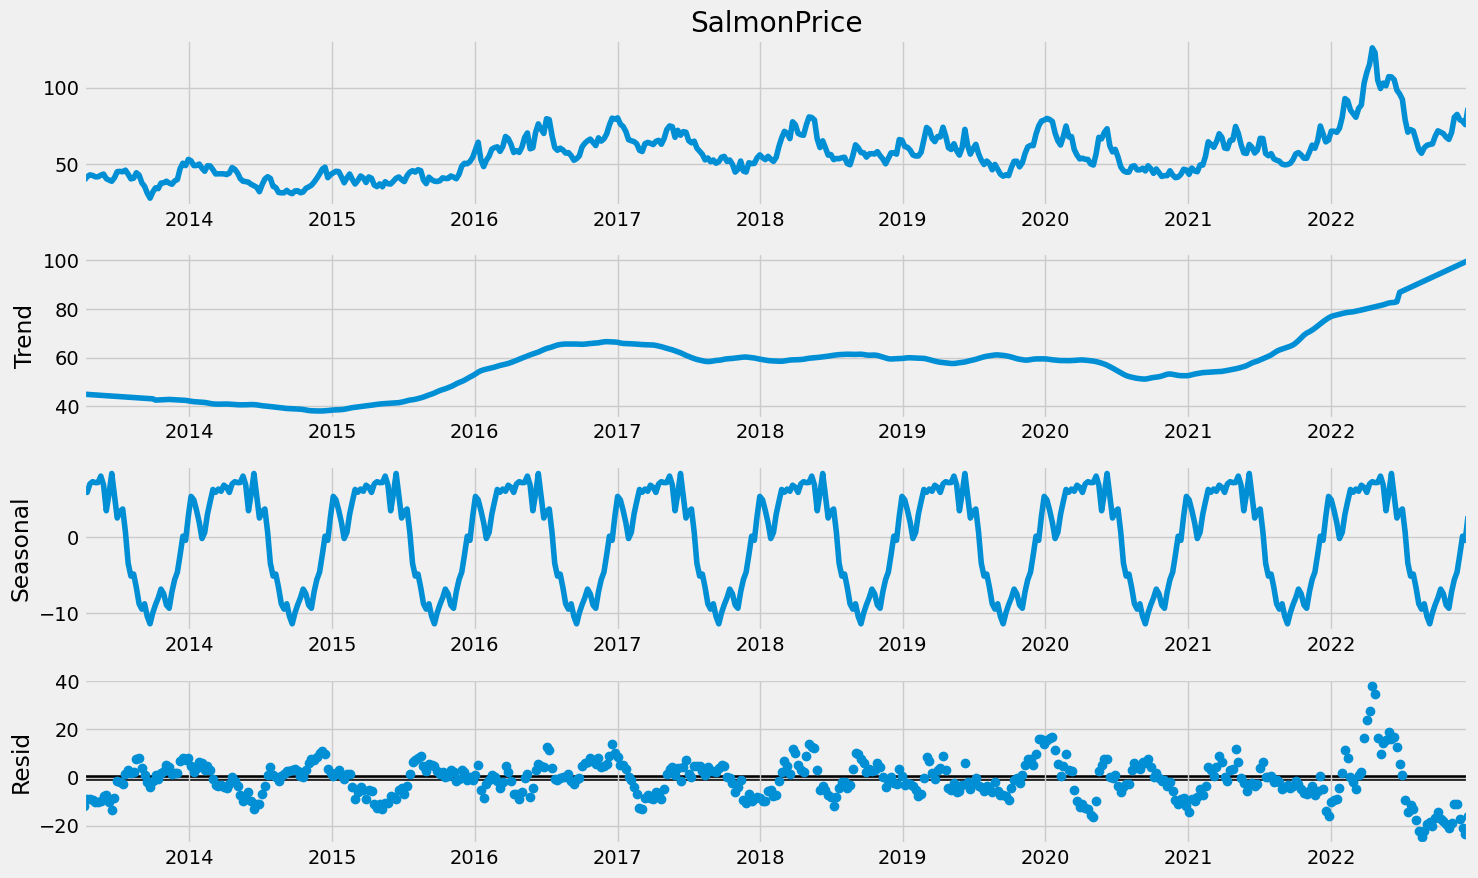

In [6]:
decomposition = sm.tsa.seasonal_decompose(var_set["SalmonPrice"], model='additive',extrapolate_trend='freq')
#fig.set_linewidth(0.1)
fig = decomposition.plot()
fig.set_size_inches(15,9)
fig.tight_layout()
plt.savefig('Figures/ARIMA/Decomposition.png')
plt.show()

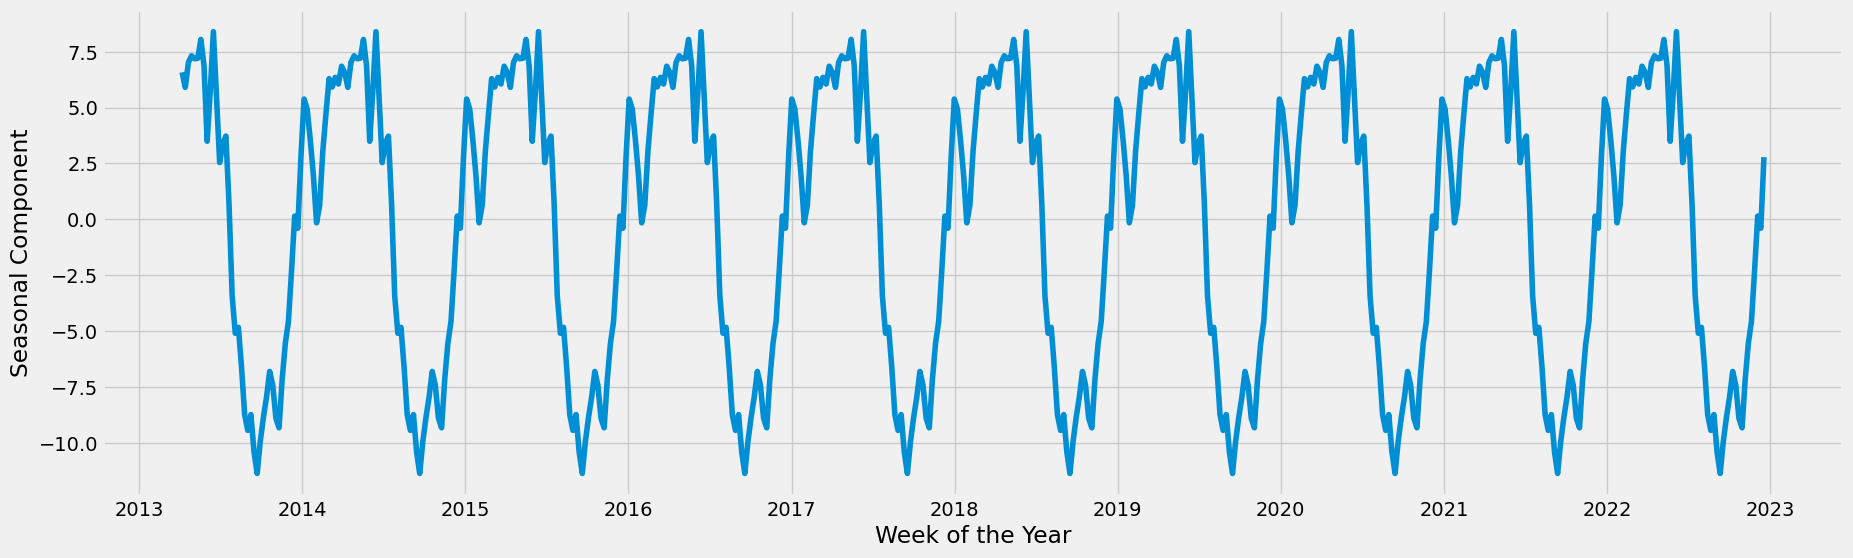

In [7]:
#seasonal = decomposition.seasonal
fig, ax = plt.subplots(figsize=(20,6))
ax.plot(decomposition.seasonal)
ax.set_xlabel('Week of the Year')
ax.set_ylabel('Seasonal Component')
plt.savefig('Figures/ARIMA/SeasonalDecompose.png')
plt.show()

In [8]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/Users/vrognaas/opt/anaconda3/envs/bachelor2023/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


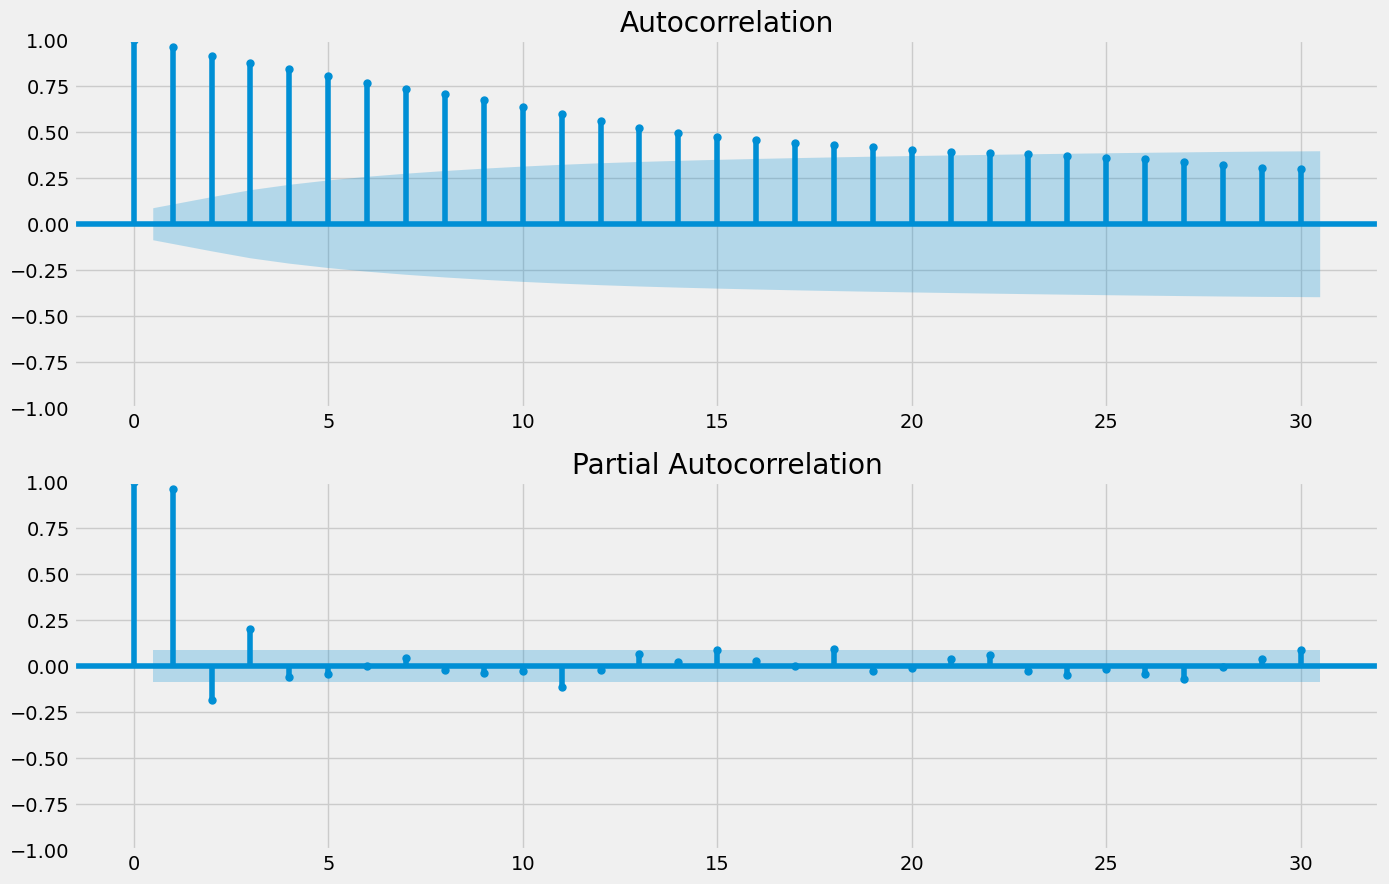

In [9]:
fig, ax = plt.subplots(2,1, figsize=(15,10))
plot_acf(var_set.SalmonPrice, ax=ax[0], lags=30)
plot_pacf(var_set.SalmonPrice, ax=ax[1], lags=30)

plt.savefig('Figures/ARIMA/OriginalACF-PACF_30.png')
plt.show()

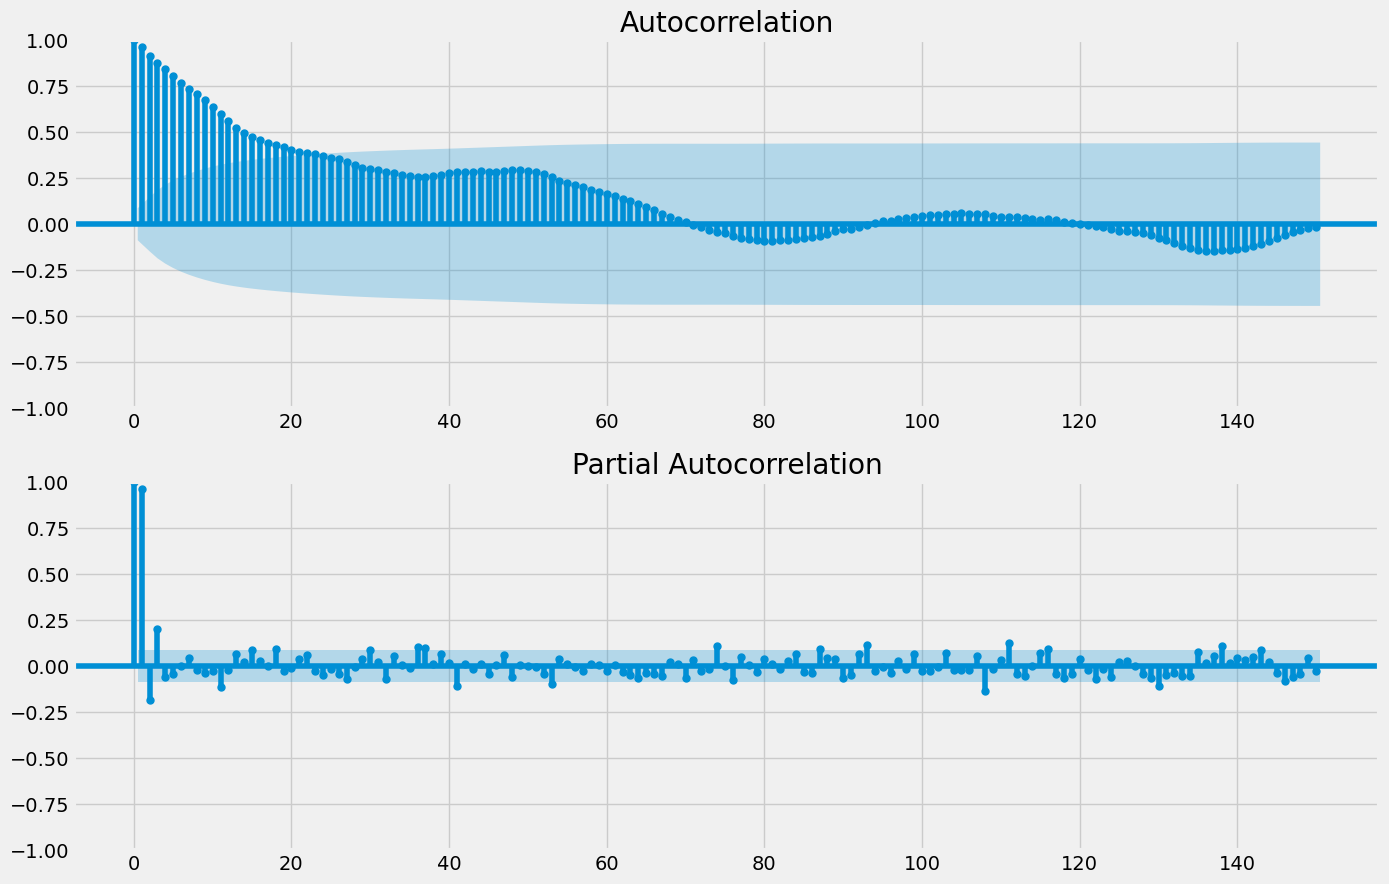

In [10]:
fig, ax = plt.subplots(2,1, figsize=(15,10))
plot_acf(var_set.SalmonPrice, ax=ax[0], lags=150)
plot_pacf(var_set.SalmonPrice, ax=ax[1], lags=150)

plt.savefig('Figures/ARIMA/OriginalACF-PACF_150.png')
plt.show()

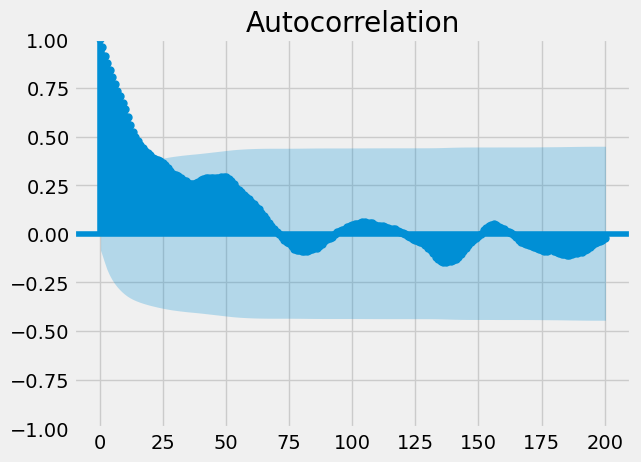

In [11]:

plot_acf(var_set.SalmonPrice, lags=200)

plt.show()

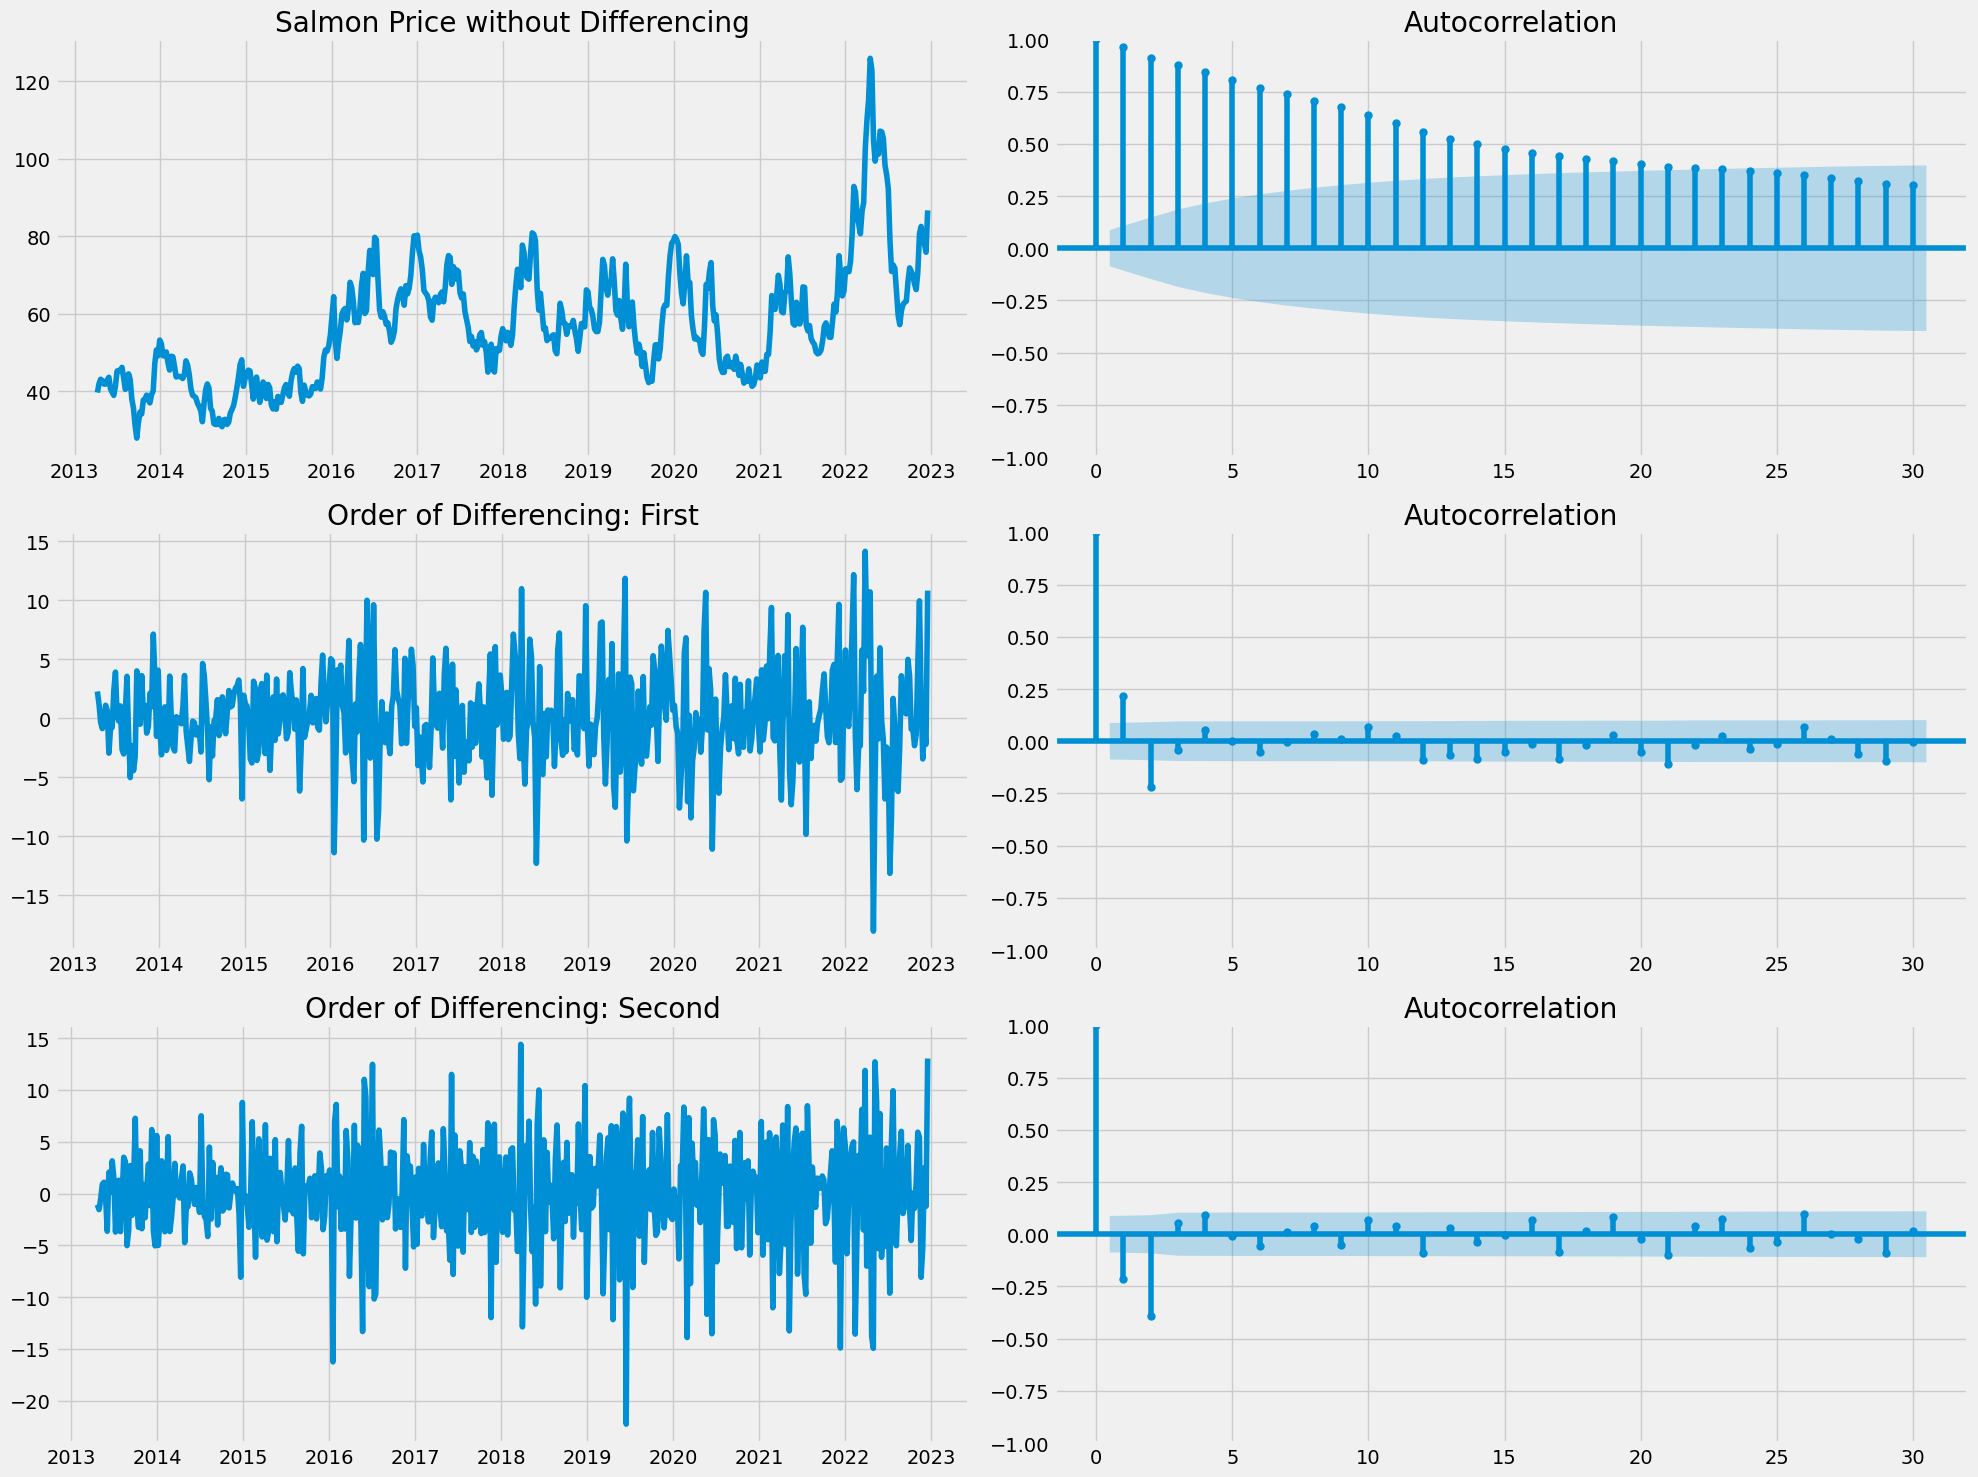

In [12]:
# The Genuine Series  
fig, axes = plt.subplots(3, 2, figsize=(20, 15))  
axes[0, 0].plot(var_set.SalmonPrice); axes[0, 0].set_title('Salmon Price without Differencing')  
plot_acf(var_set.SalmonPrice, ax = axes[0, 1], lags=30)  
  
# Order of Differencing: First  
axes[1, 0].plot(var_set.SalmonPrice.diff()); axes[1, 0].set_title('Order of Differencing: First')  
plot_acf(var_set.SalmonPrice.diff().dropna(), ax = axes[1, 1], lags=30)  
  
# Order of Differencing: Second  
axes[2, 0].plot(var_set.SalmonPrice.diff().diff()); axes[2, 0].set_title('Order of Differencing: Second')  
plot_acf(var_set.SalmonPrice.diff().diff().dropna(), ax = axes[2, 1], lags=30)  

plt.tight_layout()
  
plt.savefig('Figures/ARIMA/Diff1_ACF_30.png')
plt.show()

In [13]:
adftest = ndiffs(var_set.SalmonPrice, test = 'adf', alpha=0.05)
print("ADF Test: ", adftest)

ADF Test:  0


In [14]:
dftestdiff = adfuller(var_set.SalmonPrice.diff().dropna(), autolag="AIC") 

print(dftestdiff[1])
siglevel = dftestdiff[1]

if dftestdiff[1] < 0.05:
  print("Salmon price is stationary.")
else:
  print("Sig-level is:",siglevel.round(5),"\nSalmon price is not stationary at a 5% sig-level.")

2.97053517680567e-24
Salmon price is stationary.


In [15]:
std_salmon = var_set.SalmonPrice.describe()[2]
std_slamondiff1 = var_set.SalmonPrice.diff(1).dropna().describe()[2]
std_slamondiff2 = var_set.SalmonPrice.diff(2).dropna().describe()[2]
std_slamondiff3 = var_set.SalmonPrice.diff(3).dropna().describe()[2]

In [16]:
std_salmondf = pd.DataFrame({'Standard deviation':[std_salmon]}, index=['No differencing'])

In [17]:
std_salmondf = std_salmondf.append(pd.DataFrame({'Standard deviation':[std_slamondiff1]},index=['First differencing']))

/var/folders/xy/_0zst1c12b9_m_438bw49zw40000gn/T/ipykernel_78206/1956071333.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  std_salmondf = std_salmondf.append(pd.DataFrame({'Standard deviation':[std_slamondiff1]},index=['First differencing']))


In [18]:
std_salmondf = std_salmondf.append(pd.DataFrame({'Standard deviation':[std_slamondiff2]},index=['Second differencing']))
std_salmondf = std_salmondf.append(pd.DataFrame({'Standard deviation':[std_slamondiff3]},index=['Third differencing']))

/var/folders/xy/_0zst1c12b9_m_438bw49zw40000gn/T/ipykernel_78206/4255809871.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  std_salmondf = std_salmondf.append(pd.DataFrame({'Standard deviation':[std_slamondiff2]},index=['Second differencing']))
/var/folders/xy/_0zst1c12b9_m_438bw49zw40000gn/T/ipykernel_78206/4255809871.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  std_salmondf = std_salmondf.append(pd.DataFrame({'Standard deviation':[std_slamondiff3]},index=['Third differencing']))


In [19]:
std_salmondf

,Standard deviation
No differencing,15.455462
First differencing,3.998094
Second differencing,6.223764
Third differencing,7.395703


In [20]:
std_salmondf.style.to_latex('Figures/ARIMA/StdDevTable.tex', hrules=True)

/Users/vrognaas/opt/anaconda3/envs/bachelor2023/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


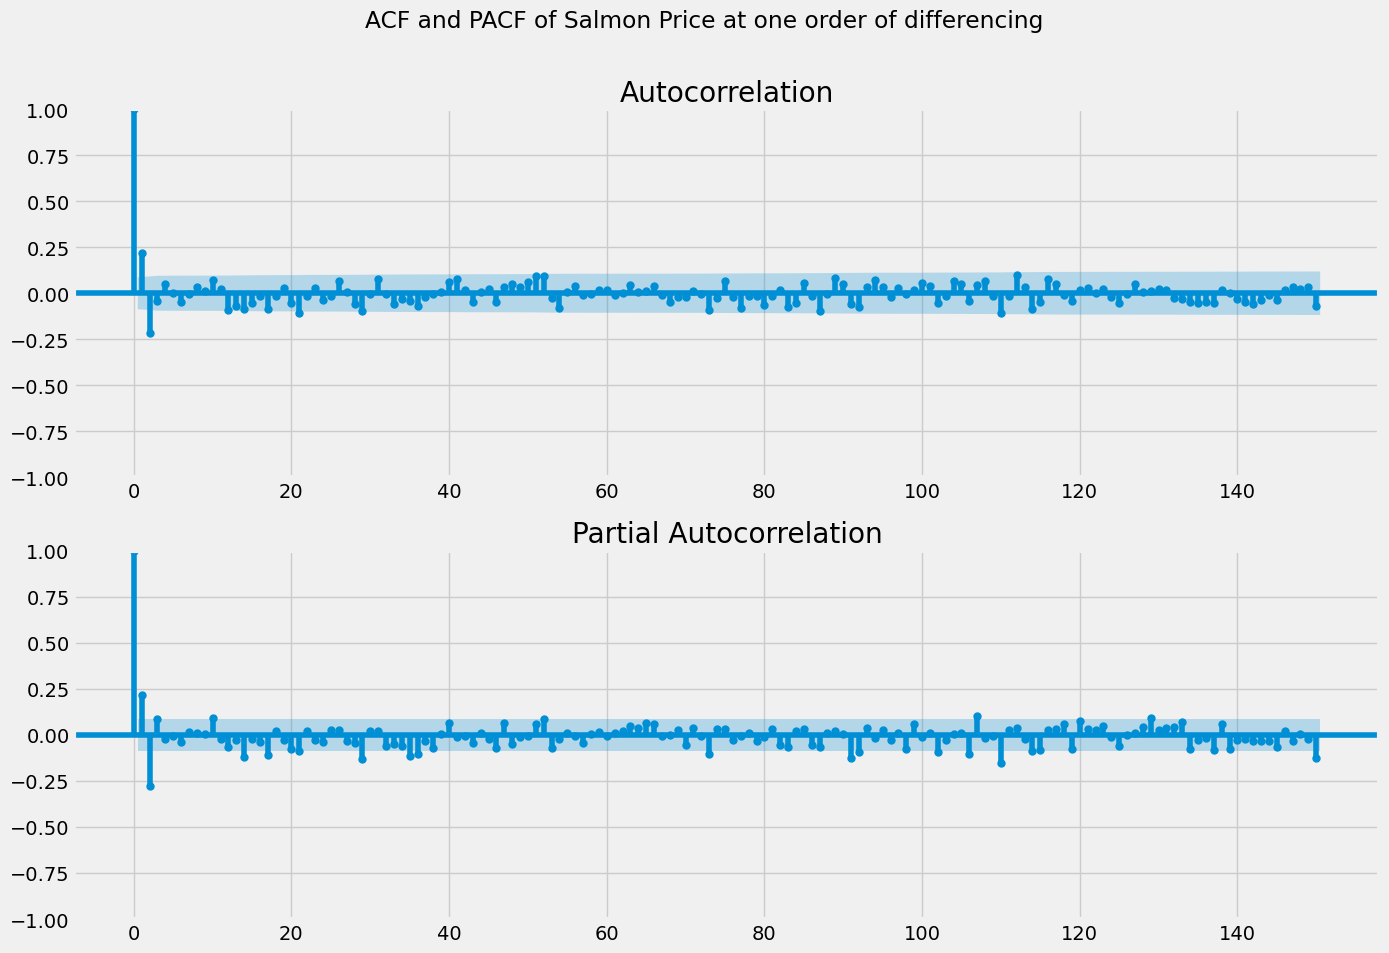

In [21]:
fig, ax = plt.subplots(2,1, figsize=(15,10))
fig.suptitle('ACF and PACF of Salmon Price at one order of differencing')
plot_acf(var_set.SalmonPrice.diff().dropna(), ax=ax[0], lags=150)
plot_pacf(var_set.SalmonPrice.diff().dropna(), ax=ax[1], lags=150)

plt.savefig('Figures/ARIMA/DiffACF-PACF_150.png')
plt.show()

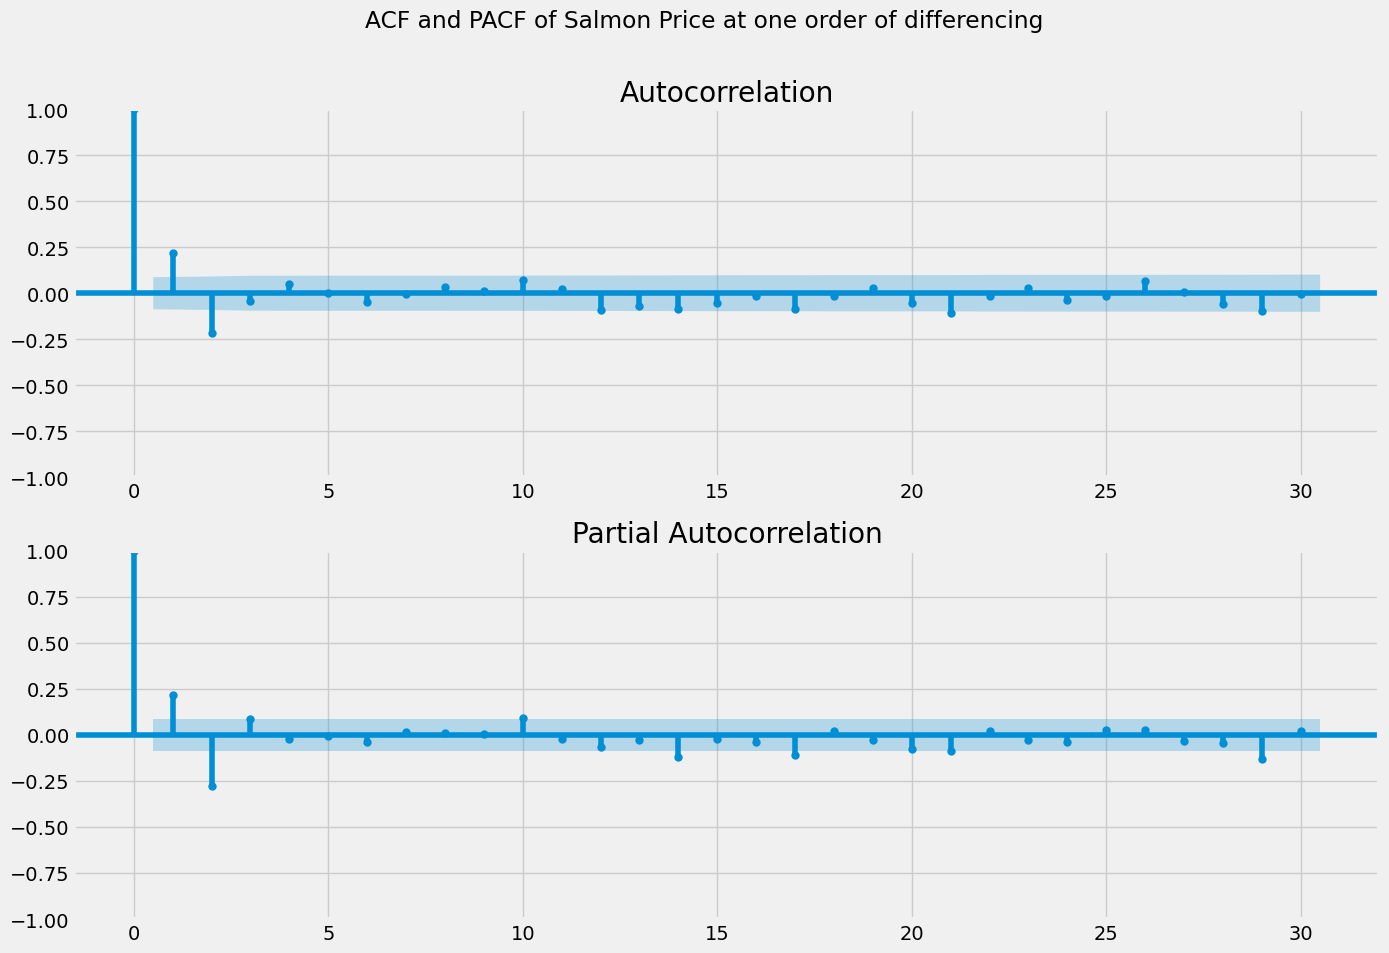

In [22]:
fig, ax = plt.subplots(2,1, figsize=(15,10))
fig.suptitle('ACF and PACF of Salmon Price at one order of differencing')
plot_acf(var_set.SalmonPrice.diff().dropna(), ax=ax[0], lags=30)
plot_pacf(var_set.SalmonPrice.diff().dropna(), ax=ax[1], lags=30)

plt.savefig('Figures/ARIMA/DiffACF-PACF_30.png')
plt.show()

/Users/vrognaas/opt/anaconda3/envs/bachelor2023/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


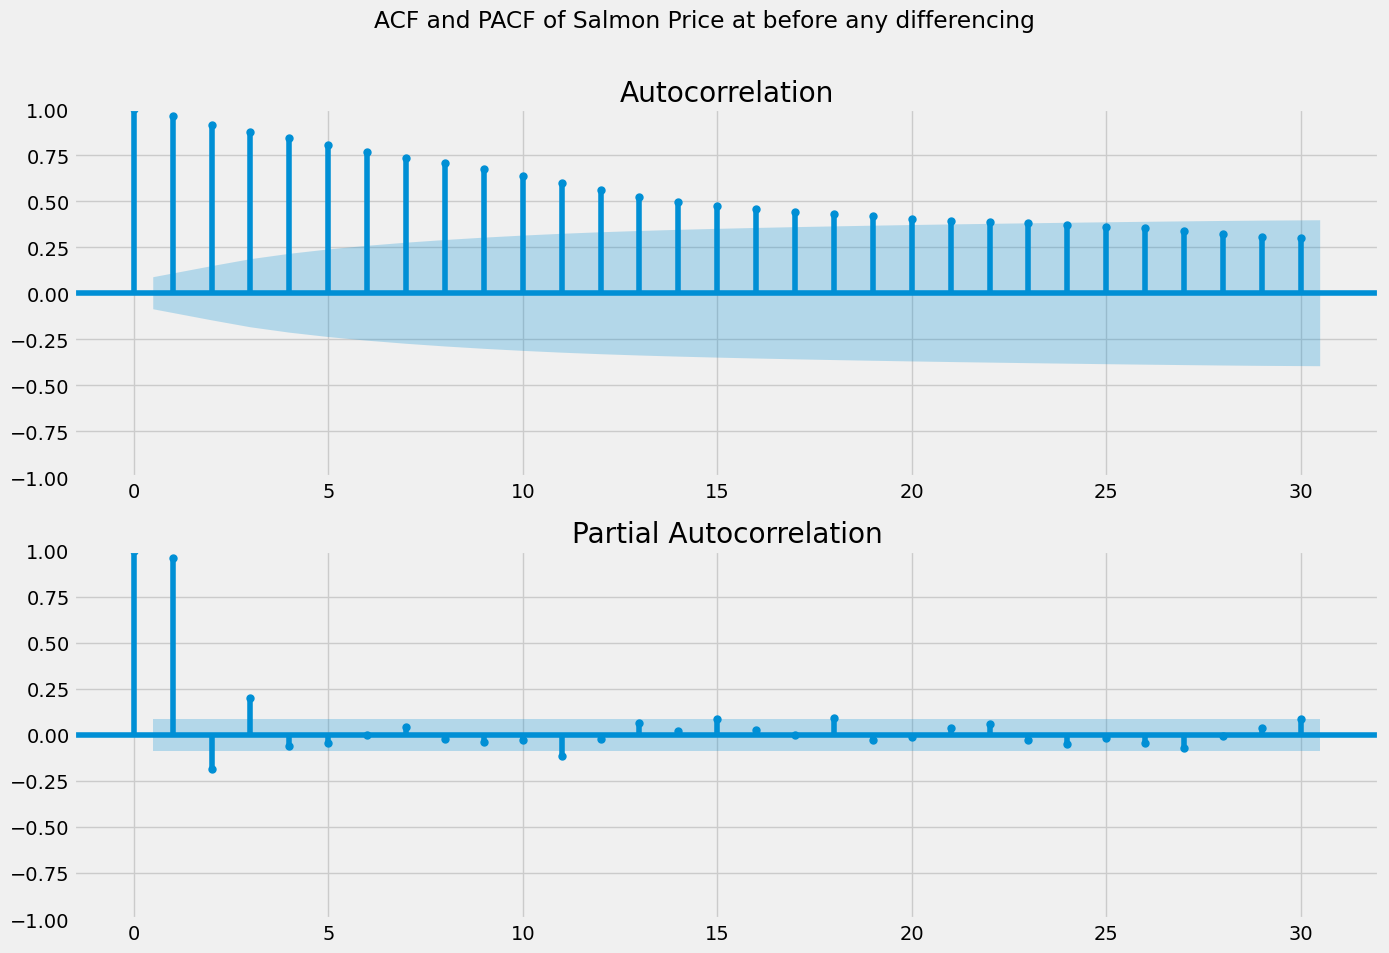

In [23]:
fig, ax = plt.subplots(2,1, figsize=(15,10))
fig.suptitle('ACF and PACF of Salmon Price at before any differencing')
plot_acf(var_set.SalmonPrice, ax=ax[0], lags=30)
plot_pacf(var_set.SalmonPrice, ax=ax[1], lags=30)

plt.savefig('Figures/ARIMA/OrigACF-PACF_30.png')
plt.show()